['np', 'DET1', 'DET1E']


/home/andrei2/anaconda3/envs/pyne27/lib/python2.7/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)


<IPython.core.display.Javascript object>


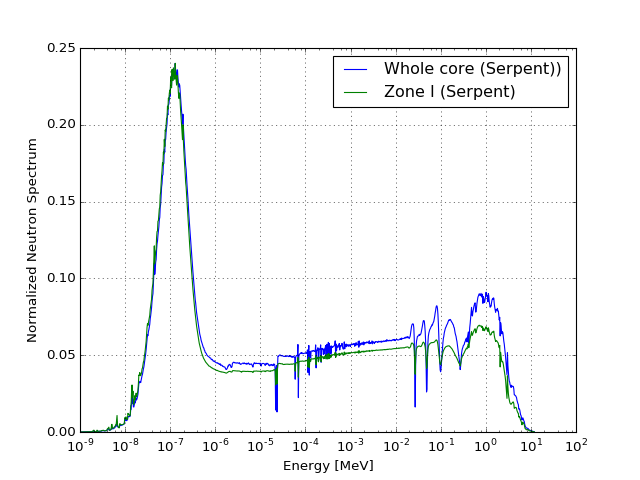

In [1]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
from pyne import serpent
from pyne import nucname

det0 = serpent.parse_det('/home/andrei2/Desktop/git/msr-neutronics/neutronics_paper/reproc/core_det0.m')

det10 = serpent.parse_det('/home/andrei2/Desktop/git/msr-neutronics/axial_reflector/core_det0.m')
#det1 = serpent.parse_det('/home/andrei2/Desktop/git/msr-neutronics/neutronics_paper/core_det1.m')
energy_grid = det0['DET1E']
spectrum_grid = det0['DET1']
spectrum_grid2 = det10['DET1']
energy = energy_grid[:,2]
flux_spectrum = spectrum_grid[:,10]
print list(det0.keys())
#print energy
#print flux_spectrum
csv = np.genfromtxt ('park_spectra_2.csv', delimiter=",")
energy_p = csv[:,0]
spectrum_p = csv[:,1]

# Initialize figure
fig_1 = matplotlib.pyplot.figure(1)
ax = fig_1.add_subplot(111)
ax.grid(True)
#ax.set_ylim(0,50)
ax.set_ylim(0,0.25)
ax.semilogx(energy, spectrum_grid[:,10]/(np.amax(spectrum_grid[:,10])/0.24), '-', label='Whole core (Serpent))')
ax.semilogx(energy, spectrum_grid2[:,10]/(np.amax(spectrum_grid2[:,10])/0.24), '-', label='Zone I (Serpent)')
#ax.semilogx(energy_p, spectrum_p, '-', label='MCNP6 (Park et al. 2015 [4])')
ax.legend(loc=0)
ax.set_ylabel('Normalized Neutron Spectrum')
ax.set_xlabel('Energy [MeV]')
#ax.set_title(plot_title)
fig_1.show()
#fig_1.savefig('../../publications/figures/figure_3_1.png',bbox_inches='tight')